In [1]:
import sys
sys.path.append('../')  # Add the parent directory to the system path


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.preprocess import DataProcessor

In [21]:
df = pd.read_xml("../data/KUH.XML")
df.head(2)

,StringValue,NumberOfParameters,Service,TechnicalEventType,TechnicalID,Description,TimeStamp,ProcessName,MemoField
0,Memo-field,NaN,None,None,NaN,None,None,None,None
1,None,226502.0,None,None,NaN,None,None,None,None


In [22]:
processor = DataProcessor()
df_large , df_small =  processor.prep_data(df)

Extracting Data from Message Column.......


In [53]:
df_large.head()

,NewCFactor,N_Pulses,RunLength,RunLength_Cum,N_Pulses_Cum
232568,0.995550274848938,47.0,3.65319991111755,3.65319991111755,47.0
232465,0.995550274848938,37.0,3.09990000724792,6.75309991836547,84.0
232292,0.995550274848938,14.0,1.44430005550385,8.19739997386932,98.0
232233,0.995550274848938,31.0,2.57520008087158,10.77260005474090,129.0
232099,0.995550274848938,31.0,2.58080005645752,13.35340011119842,160.0


In [23]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler_X = MinMaxScaler(feature_range=(1,10))

scaler_y = MinMaxScaler(feature_range=(1,10))

x_scaled = scaler_X.fit_transform(df_large.NewCFactor.values.reshape(-1,1))
y_scaled = scaler_y.fit_transform(df_large.N_Pulses_Cum.values.reshape(-1,1))

df_large.NewCFactor.values.shape

(294,)

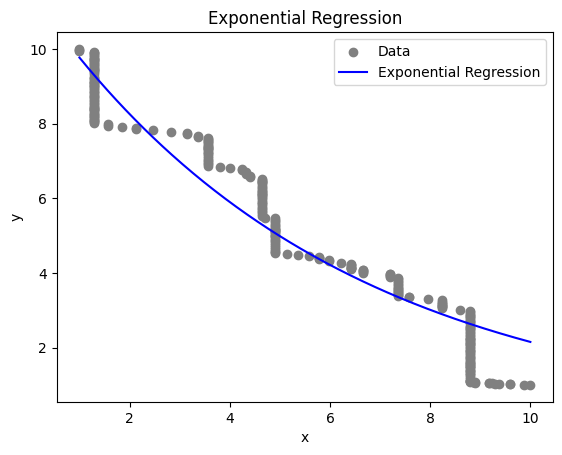

Fitted a: 11.556061668261771
Fitted b: -0.16809547444671433


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Example dataset
x_data =  x_scaled.reshape(-1,) 
y_data = y_scaled.reshape(-1,) 

# y_data = np.log(y_data)

# Perform exponential regression using curve_fit
params, _ = curve_fit(exponential_func, x_data, y_data ,  maxfev=50000 )

# Extract the fitted parameters
a_fit, b_fit = params

# Generate points for the fitted exponential curve
x_fit = np.linspace(min(x_data), max(x_data), len(x_data))
y_fit = exponential_func(x_fit, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, color='gray', label='Data')
plt.plot(x_fit, y_fit, color='blue', label='Exponential Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Regression')
plt.legend()
plt.show()

print(f"Fitted a: {a_fit}")
print(f"Fitted b: {b_fit}")


In [104]:
len(y_data) , len(y_fit)

(1643, 1643)

In [25]:
fail_point = scaler_X.transform(np.array([0.9053574604]).reshape(-1,1))

predicted_y = exponential_func(fail_point, a_fit, b_fit)

scaler_y.inverse_transform(predicted_y) , predicted_y

/tmp/ipykernel_5266/3953857322.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [98]:
fail_point

array([[-1199.90218256]])

In [26]:
from sklearn.metrics import mean_squared_error as mse 

mse(y_scaled , y_fit , squared=False)

4.867210630681205

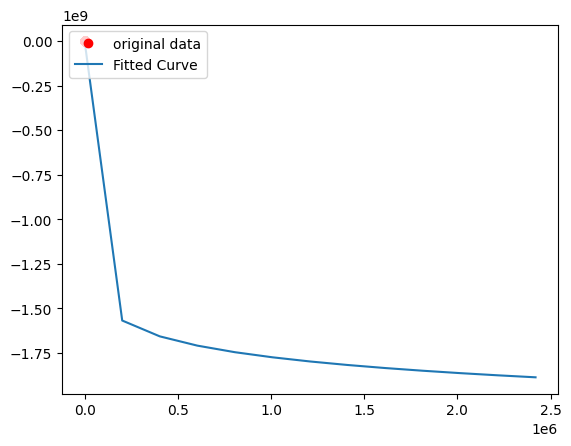

In [56]:
import scipy.optimize as optimize

plt.plot(x_data, y_data, 'ro', label="original data")

# curvefit

def func(t, a, b):
    return a + b * np.log(t)

popt, pcov = optimize.curve_fit(func, x_data, y_data, maxfev=1000)
t = np.linspace(1, 3600 * 24 * 28, 13)
plt.plot(t, func(t, *popt), label="Fitted Curve")
plt.legend(loc='upper left')
plt.show()

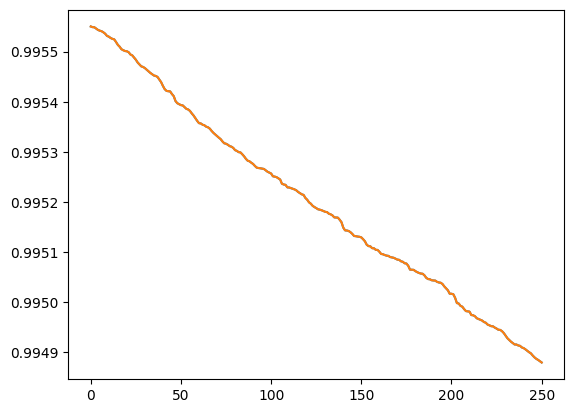

In [20]:
import numpy as np

# Create a numpy array with duplicates
original_array = df_uni.NewCFactor.values

# Find unique elements and their indices
unique_elements, first_occurrences_indices = np.unique(original_array, return_index=True)

# Sort the indices to preserve the original order
sorted_indices = np.sort(first_occurrences_indices)

# Create the new array without duplicates
unique_array = original_array[sorted_indices]

plt.plot(original_array)
plt.plot(unique_array)

In [23]:
df_uni = df_large.drop_duplicates(subset="NewCFactor" , keep="first")
df_uni.reset_index(inplace=True , drop=True)
df_uni

,NewCFactor,N_Pulses,RunLength,RunLength_Cum,N_Pulses_Cum
0,0.995550274848938,47.0,3.65319991111755,3.653199911117550,47.0
1,0.995548963546753,20.0,1.83179998397827,34.458699822425835,432.0
2,0.995548665523529,34.0,2.80949997901917,109.398200392723069,1395.0
3,0.995546042919159,44.0,3.62700009346008,113.025200486183152,1439.0
4,0.995543420314789,11.0,1.42799997329712,118.838000416755662,1505.0
...,...,...,...,...,...
246,0.994889676570892,39.0,3.34759998321533,12715.453230589626401,79113.0
247,0.994886696338654,40.0,2.04889988899231,12722.856330484150021,79212.0
248,0.994884550571442,97.0,7.22860002517700,12730.084930509327023,79309.0
249,0.994881868362427,45.0,3.68729996681213,12733.772230476139157,79354.0


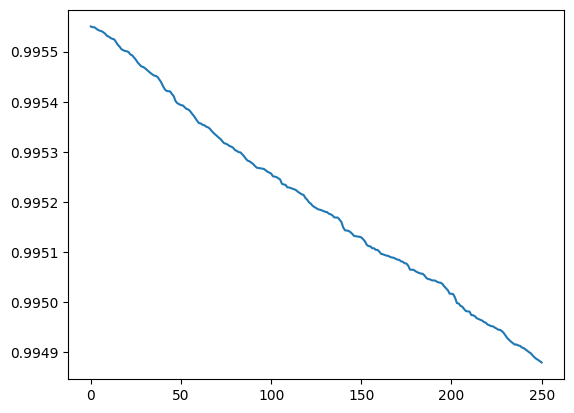

In [25]:
# plt.plot(df_large.NewCFactor)
plt.plot(df_uni.NewCFactor)

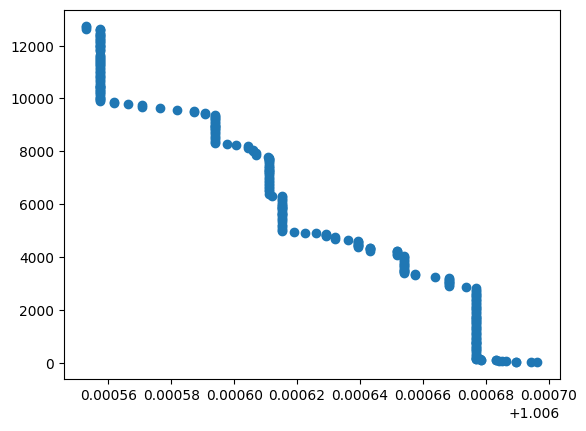

In [5]:
import scipy
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values
# np.polyfit(x ,y , len(x))
# scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(1e-4, 1e-6))
x.shape , y.shape
plt.scatter(x , y)

In [6]:
from sklearn.preprocessing import MinMaxScaler

std_X =   MinMaxScaler(feature_range=(1,6))

std_y =   MinMaxScaler(feature_range=(1,6))

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# df_large = pd.read_csv("../data/df_large_prep.csv",index_col=0)
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values

y = np.log(y)

x = std_X.fit_transform(x.reshape(-1,1))
y = std_y.fit_transform(y.reshape(-1,1))

X_train ,X_test , y_train ,y_test = train_test_split(x ,y , test_size = 0.15 , random_state=3407)

X_train = std_X.fit_transform(X_train.reshape(-1,1))
X_test = std_X.transform(X_test.reshape(-1,1))

y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))

# plt.scatter(x , y )

[-0.49131097  6.76725751]
267.564624463203


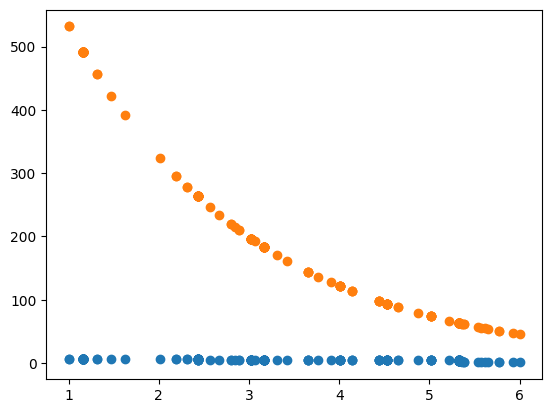

In [58]:
from sklearn.metrics import mean_squared_error as mse
## try normalization
def pred(coefs , x ):
    slope ,intercept = coefs
    preds = np.exp(intercept) * np.exp(slope * x) 
    return preds

def fit_exp(x , y):

    # x = np.array([10, 19, 30, 35, 51])
    # y = np.array([1, 7, 20, 50, 79])
    # np.polyfit(x, np.log(y), 1)
    #    y ≈ exp(-0.401) * exp(0.105 * x) = 0.670 * exp(0.105 * x)
    # (^ biased towards small values)
    coefs = np.polyfit(x.ravel(), y.ravel(), 1)#, w=np.sqrt(y.reshape(-1)))
    print(coefs)

    preds = pred(coefs ,x)

    rmse = mse(y , preds ,squared=False)
    print(rmse)

    plt.scatter(x , y)
    plt.scatter(x , preds )#np.exp(preds))
    return coefs
coefs = fit_exp(X_train , y_train)

In [51]:
fail_point = 0.9053574604
np.exp(std_y.inverse_transform(pred(coefs , std_X.transform(np.array([fail_point]).reshape(-1,1))).reshape(-1,1)))

array([[7.52203669]])

In [85]:
coefs

array([0.50261661, 0.1979786 ])

In [50]:
p = np.poly1d(coefs)
np.exp(std_y.inverse_transform(p( std_X.transform(np.array([fail_point]).reshape(-1,1))).reshape(-1,1)))

array([[1.96905658]])

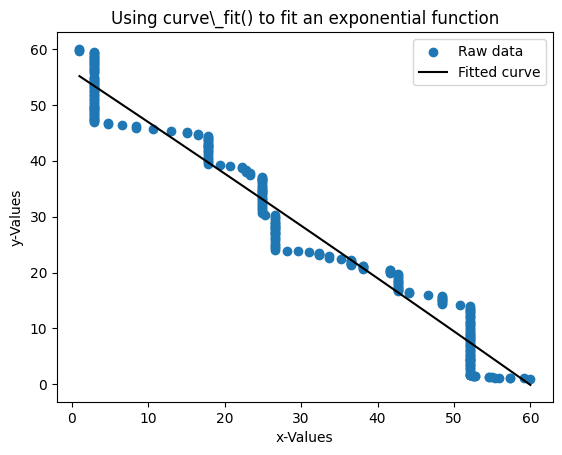

In [59]:
from scipy.optimize import curve_fit
# Have an initial guess as to what the values of the parameters are
a_guess = 5
b_guess = 0.6
c_guess = 42

kk=-1
x = df_large.NewCFactor.values
y = df_large.N_Pulses_Cum.values

# y = -np.log(y)


from sklearn.preprocessing import MinMaxScaler

std_X =   MinMaxScaler(feature_range=(1,60))
std_y =   MinMaxScaler(feature_range=(1,60))


x_scaled = std_X.fit_transform(x.reshape(-1,1)).reshape(-1)

y_scaled = std_y.fit_transform(y.reshape(-1,1)).reshape(-1)

# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(
    lambda t, a, b, c: a * np.exp(b * t) + c,
    x_scaled, y_scaled, p0=(a_guess, b_guess, c_guess)
)



a = popt[0]
b = popt[1]
c = popt[2]


x_fitted = np.linspace(np.min(x_scaled), np.max(x_scaled), 100)
y_fitted =   a * np.exp(b * x_fitted) + c
# y_fitted = np.exp(y_fitted)

# Plot
ax = plt.axes()
ax.scatter(x_scaled, y_scaled, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title(r'Using curve\_fit() to fit an exponential function')
ax.set_ylabel('y-Values')
# ax.set_ylim(0, 500)
ax.set_xlabel('x-Values')
ax.legend()

In [16]:
y[:5] , y_scaled[:5]

(array([-2.77258872, -3.29583687, -3.66356165, -3.66356165, -3.95124372]),
 array([6.        , 5.60830067, 5.33302487, 5.33302487, 5.1176684 ]))

(294, 5)
(283, 5)


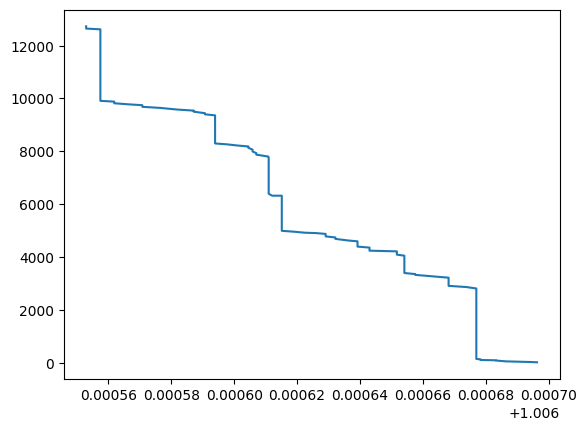

In [53]:
df_uni = df_large.copy()
print(df_uni.shape)
# plt.plot(df_uni.NewCFactor.values , df_uni.N_Pulses_Cum.values)

df_uni = df_uni.drop_duplicates(subset = "N_Pulses_Cum",)
print(df_uni.shape)

plt.plot(df_uni.NewCFactor.values , df_uni.N_Pulses_Cum.values)


# NN

In [17]:
df_large[["RunLength_Cum","N_Pulses_Cum" ]].to_numpy().shape , df_large.NewCFactor.values.reshape(-1,1).shape


((294, 2), (294, 1))

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from sklearn.model_selection import train_test_split

x = df_small.NewCFactor.values.reshape(-1,1)
y = df_small[["RunLength_Cum","N_Pulses_Cum" ]].to_numpy()
X_train ,X_test , y_train ,y_test = train_test_split(x ,y , test_size = 0.15 , random_state=3407)

from sklearn.preprocessing import MinMaxScaler

std_X =   MinMaxScaler(feature_range=(1,60))
std_y =   MinMaxScaler(feature_range=(1,60))


X_train_scaled = std_X.fit_transform(X_train.reshape(-1,1)).reshape(-1)
X_test_scaled = std_X.transform(X_test.reshape(-1,1)).reshape(-1)

y_train_scaled = std_y.fit_transform(y_train.reshape(-1,1)).reshape(-1)
y_test_scaled = std_y.transform(y_test.reshape(-1,1)).reshape(-1)
# Define the regression model
class SimpleRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Generate some toy data for training
np.random.seed(42)




# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).reshape(-1,1)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).reshape(-1,2)

# Define hyperparameters
input_size = 1
hidden_size = 64
output_size = 2  # Two output values
learning_rate = 0.1
num_epochs = 10000

# Create the model and set up the loss function and optimizer
model = SimpleRegression(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model with some new data
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
predicted = model(X_test_tensor)
print("Predicted values:")
print(predicted)


Epoch [100/10000], Loss: 144.4249
Epoch [200/10000], Loss: 144.3791
Epoch [300/10000], Loss: 144.3791
Epoch [400/10000], Loss: 144.3791
Epoch [500/10000], Loss: 144.3791
Epoch [600/10000], Loss: 144.3791
Epoch [700/10000], Loss: 144.3791
Epoch [800/10000], Loss: 144.3791
Epoch [900/10000], Loss: 144.3791
Epoch [1000/10000], Loss: 144.3791
Epoch [1100/10000], Loss: 144.3791
Epoch [1200/10000], Loss: 144.3791
Epoch [1300/10000], Loss: 144.3791
Epoch [1400/10000], Loss: 144.3791
Epoch [1500/10000], Loss: 144.3791
Epoch [1600/10000], Loss: 144.3791
Epoch [1700/10000], Loss: 144.3791
Epoch [1800/10000], Loss: 144.3791
Epoch [1900/10000], Loss: 144.3791
Epoch [2000/10000], Loss: 144.3791
Epoch [2100/10000], Loss: 144.3791
Epoch [2200/10000], Loss: 144.3791
Epoch [2300/10000], Loss: 144.3791
Epoch [2400/10000], Loss: 144.3791
Epoch [2500/10000], Loss: 144.3791
Epoch [2600/10000], Loss: 144.3791
Epoch [2700/10000], Loss: 144.3791
Epoch [2800/10000], Loss: 144.3791
Epoch [2900/10000], Loss: 144

In [29]:
fail_point = torch.tensor([0.9053574604])


In [37]:
model(torch.tensor(x , dtype=torch.float32)).detach().numpy().shape

(697, 2)

In [39]:
from utils.evaluation import eval_model , calc_rmse

calc_rmse(y , model(torch.tensor(x , dtype=torch.float32)).detach().numpy())

37719.74583580027

         RunLength_Cum        N_Pulses_Cum
0    3.500108480453491  33.034259796142578
1    3.500108480453491  33.034259796142578
2    3.500108480453491  33.034259796142578
3    3.500108480453491  33.034259796142578
4    3.500108480453491  33.034259796142578
..                 ...                 ...
692  3.500108480453491  33.034259796142578
693  3.500108480453491  33.034259796142578
694  3.500108480453491  33.034259796142578
695  3.500108480453491  33.034259796142578
696  3.500108480453491  33.034259796142578

[697 rows x 2 columns]
RMSE for train_Large RunLength_Cum : 11518.197815559066
RMSE for train_Large N_Pulses_Cum : 148886.9752778952


/tmp/ipykernel_5999/415972481.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('Set1', 2)


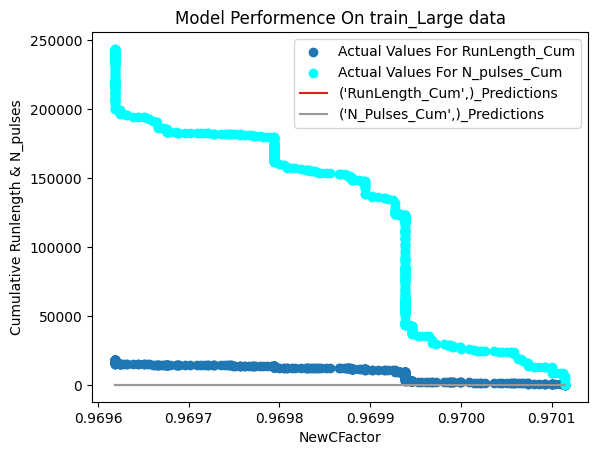

In [54]:
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import os

def calc_rmse(y_true , y_preds):

    return mse(y_true , y_preds , squared=False)


def eval_model(X , y, preds , test = False  , small = False):
    if not os.path.exists("plots/"):
        os.mkdir("plots")

    try:
        if X.shape[1] > 1 :
            X = X[: , 1].ravel() ## 1 is the column for the original Features

    except Exception as ex:
        pass


    data_type = "train" if not test else "test"
    dataset_type = "Large" if not small else "Small"

    preds = pd.DataFrame(preds , columns= [["RunLength_Cum" , "N_Pulses_Cum"]])
    y = pd.DataFrame(y , columns= [["RunLength_Cum" , "N_Pulses_Cum"]])

    print(preds)

    print(f"RMSE for {data_type}_{dataset_type} RunLength_Cum : {calc_rmse(y['RunLength_Cum'] , preds['RunLength_Cum'])}")
    print(f"RMSE for {data_type}_{dataset_type} N_Pulses_Cum : {calc_rmse(y['N_Pulses_Cum'] , preds['N_Pulses_Cum'])}")

    plt.scatter(X , y["RunLength_Cum"] ,label="Actual Values For RunLength_Cum")
    plt.scatter(X , y["N_Pulses_Cum"] ,label="Actual Values For N_pulses_Cum" , color='cyan')

    color_palette = plt.cm.get_cmap('Set1', 2)

    for i ,col in enumerate(preds.columns):
        plt.plot(X   ,preds[col] , label=f"{col}_Predictions" , color=color_palette(i))
    
    plot_title = f"Model Performence On {data_type}_{dataset_type} data"
    plt.title(plot_title)
    plt.legend()

    plt.xlabel("NewCFactor")
    plt.ylabel("Cumulative Runlength & N_pulses")
    plt.savefig(f"plots/{plot_title}_{str(datetime.now().strftime('%Y-%m-%d %H-%M-%S'))}")
    plt.show()

eval_model(x , y , model(torch.tensor(x , dtype=torch.float32)).detach().numpy())
 

In [43]:
y


array([[5.37599981e-01, 0.00000000e+00],
       [2.74533009e+01, 3.95000000e+02],
       [2.79763009e+01, 3.95000000e+02],
       ...,
       [1.83159284e+04, 2.43411000e+05],
       [1.83227885e+04, 2.43506000e+05],
       [1.83352575e+04, 2.43685000e+05]])